# LinkedIn Data Jobs Analysis

![LinkedIn Data Jobs Dataset](images/cover_photo.jpg)

# 1. Importing Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# 2. Loading Dataset

In [71]:
df = pd.read_csv("clean_jobs.csv")
df.head()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,4/14/2025,NaN,NaN,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,4/14/2025,NaN,NaN,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,4/14/2025,NaN,NaN,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,4/14/2025,NaN,NaN,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,4/16/2025,NaN,NaN,About Pinterest\n\nMillions of people around t...


In [72]:
print('Dataset shape:', df.shape)

Dataset shape: (327, 10)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               327 non-null    int64  
 1   title            327 non-null    object 
 2   company          327 non-null    object 
 3   location         327 non-null    object 
 4   link             327 non-null    object 
 5   source           327 non-null    object 
 6   date_posted      327 non-null    object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   description      327 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 25.7+ KB


In [74]:
missing = df.isna().sum()
print('Missing Values Per Column:\n\n', missing)

Missing Values Per Column:

 id                   0
title                0
company              0
location             0
link                 0
source               0
date_posted          0
work_type          327
employment_type    327
description          0
dtype: int64


# 3. Cleaning the Dataset

In [75]:
df = df.drop(['work_type', 'employment_type'], axis=1)
df.isna().sum()

id             0
title          0
company        0
location       0
link           0
source         0
date_posted    0
description    0
dtype: int64

In [76]:
duplicate_values = df.duplicated().sum()
print("Duplicate Values:", duplicate_values)

Duplicate Values: 0


In [77]:
print("Data Types of Columns:\n\n", df.dtypes)

Data Types of Columns:

 id              int64
title          object
company        object
location       object
link           object
source         object
date_posted    object
description    object
dtype: object


### Standardizing Job Title

This code standardizes job titles in the title column by using regular expressions to identify and replace various forms of similar roles with consistent labels. It consolidates titles related to analytics (e.g., Analyst, Analista) into "**Data Analyst**", software-related titles into "**Software Engineer**", scientist roles into "**Data Scientist**", and AI/ML-related roles into "**Machine Learning Engineer**". It also unifies multiple variations of data engineering roles, including flexible patterns like "Engineer, Data" or "Remote Data Engineer I", under the label "**Data Engineer**". This ensures consistency and simplifies analysis of job roles.

In [78]:
df['title'] = df['title'].str.replace(r'.*(Analytics|Analyst|ANALYST|Analista|ANALISTA|analyst).*', 'Data Analyst', regex=True)
df['title'] = df['title'].str.replace(r'.*(Software|Developer).*', 'Software Engineer', regex=True)
df['title'] = df['title'].str.replace(r'.*(Scientist|Cientista).*', 'Data Scientist', regex=True)
df['title'] = df['title'].str.replace(r'.*(AI|ML|Machine).*', 'Machine Learning Engineer', regex=True)
df['title'] = df['title'].str.replace(r'.*(Data Engineer|Data Associate|Data Intern).*', 'Data Engineer', regex=True)
df['title'] = df['title'].str.replace(r'(?i)(.*\s)?(data.*engineer|engineer.*data)(,?\s?I?)?', 'Data Engineer', regex=True)

In [79]:
df['title'].value_counts()

title
Data Analyst                 170
Data Engineer                 69
Data Scientist                58
Machine Learning Engineer     21
Software Engineer              9
Name: count, dtype: int64

In [80]:
print("Jobs Title Count:", df['title'].count())

Jobs Title Count: 327


In [81]:
df.location.value_counts()

location
New York, NY                             31
United States                            26
Bengaluru, Karnataka, India              25
San Francisco, CA                        19
Sunnyvale, CA                            10
                                         ..
Greater Kolkata Area                      1
Amsterdam, North Holland, Netherlands     1
Gambir, Jakarta, Indonesia                1
Greater Istanbul                          1
Mumbai, Maharashtra, India                1
Name: count, Length: 120, dtype: int64

This code snippet is used to extract and standardize the country name from a location string, particularly focusing on identifying U.S. locations and labeling them as "**United States**".

In [82]:
us_states = ['New York', 'Washington', 'San Francisco', 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 
                 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 
                 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 
                 'WI', 'WY', 'DC']

def assign_country(location):
    parts = location.strip().split(", ")
    if parts[-1] in us_states:
        return "United States"
    elif "United States" in parts:
        return "United States"
    else:
        return location  

df['country'] = df['location'].apply(assign_country)

In [83]:
df.country.value_counts()

country
United States                            191
Bengaluru, Karnataka, India               25
London, England, United Kingdom            8
London Area, United Kingdom                8
São Paulo, São Paulo, Brazil               4
                                        ... 
Greater Kolkata Area                       1
Amsterdam, North Holland, Netherlands      1
Gambir, Jakarta, Indonesia                 1
Greater Istanbul                           1
Mumbai, Maharashtra, India                 1
Name: count, Length: 71, dtype: int64

This code is used to standardize the country names in the country column of a DataFrame by checking if any known country from a predefined list appears in the location string.

In [84]:
countries = ['United States', 'India', 'United Kingdom', 'Brazil', 'Canada', 'Indonesia', 'Netherlands',
             'Bulgaria', 'Saudi Arabia', 'Spain', 'Singapore', 'Poland', 'Ireland', 'Germany', 'Malaysia', 'Greece', 'Egypt',
             'Mexico', 'Philippines', 'South Africa', 'France', 'Switzerland', 'United Arab Emirates']


# Function to extract country name if present
def extract_country(location):
    for country in countries:
        if country in location:
            return country
    return location  # leave as-is if no country matched

# Apply function
df['country'] = df['country'].apply(extract_country)

In [85]:
df.country.value_counts()

country
United States                        191
India                                 47
United Kingdom                        25
Brazil                                10
Indonesia                              5
Canada                                 5
Ireland                                4
Spain                                  3
South Africa                           3
Washington DC-Baltimore Area           2
New York City Metropolitan Area        2
San Francisco Bay Area                 2
Lisbon Metropolitan Area               2
Malaysia                               2
Greater Bengaluru Area                 2
Greece                                 2
Egypt                                  2
Saudi Arabia                           1
Bulgaria                               1
Germany                                1
Singapore                              1
Greater Minneapolis-St. Paul Area      1
Poland                                 1
Mexico                                 1
France  

This code standardizes specific regional or metropolitan area names in the country column by replacing them with their respective country names for consistency in location-based analysis.

In [86]:
df['country'] = df['country'].replace(['Washington DC-Baltimore Area', 'Greater Minneapolis-St. Paul Area',
                                        'New York City Metropolitan Area', 'Greater Chicago Area', 'Utica-Rome Area',
                                        'San Francisco Bay Area'], 'United States')
df['country'] = df['country'].replace(['Greater Bengaluru Area', 'Greater Kolkata Area'], 'India')
df['country'] = df['country'].replace(['Lisbon Metropolitan Area', 'Porto Metropolitan Area'], 'Portugal')
df['country'] = df['country'].replace('Bangkok Metropolitan Area', 'Thailand')
df['country'] = df['country'].replace('Greater Istanbul', 'Turkey')

In [87]:
df.country.value_counts()

country
United States           200
India                    50
United Kingdom           25
Brazil                   10
Indonesia                 5
Canada                    5
Ireland                   4
Spain                     3
Portugal                  3
South Africa              3
Egypt                     2
Malaysia                  2
Greece                    2
Bulgaria                  1
Singapore                 1
Saudi Arabia              1
Germany                   1
Poland                    1
Mexico                    1
France                    1
United Arab Emirates      1
Switzerland               1
Thailand                  1
Philippines               1
Netherlands               1
Turkey                    1
Name: count, dtype: int64

# 4. Data Visualization

This code snippet visualizes the **top 5 most common job titles** in a dataset using a horizontal bar chart.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15340\2354240233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='Blues_r')


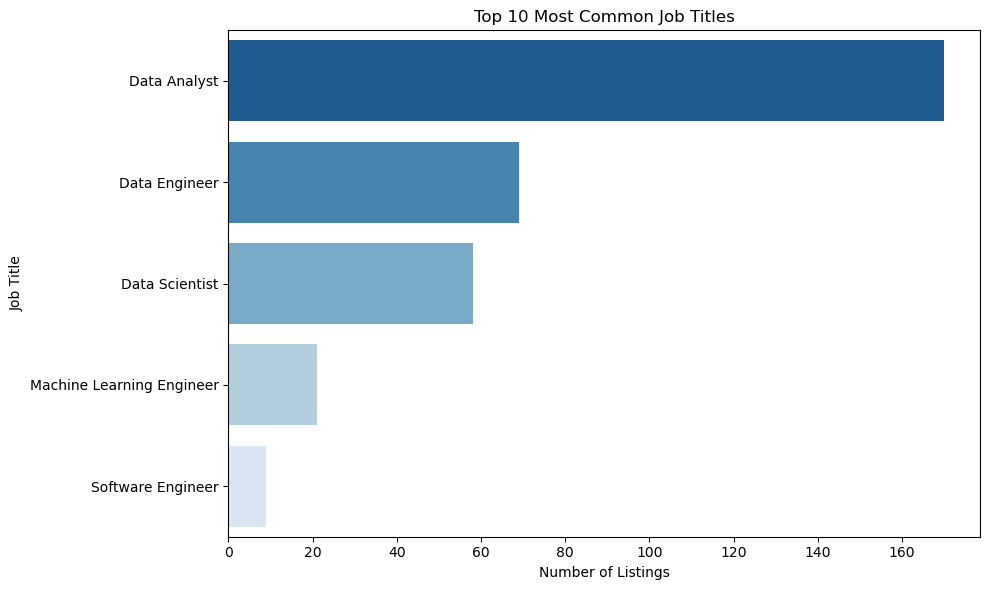

In [88]:
top_titles = df['title'].value_counts().head()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='Blues_r')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Listings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.savefig('10 Most Common Jobs.png', dpi=300, bbox_inches='tight')
plt.show()

This code generates a horizontal bar chart that displays the **top 10 countries** with the most job listings in the dataset.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15340\1877859930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='Blues_r')


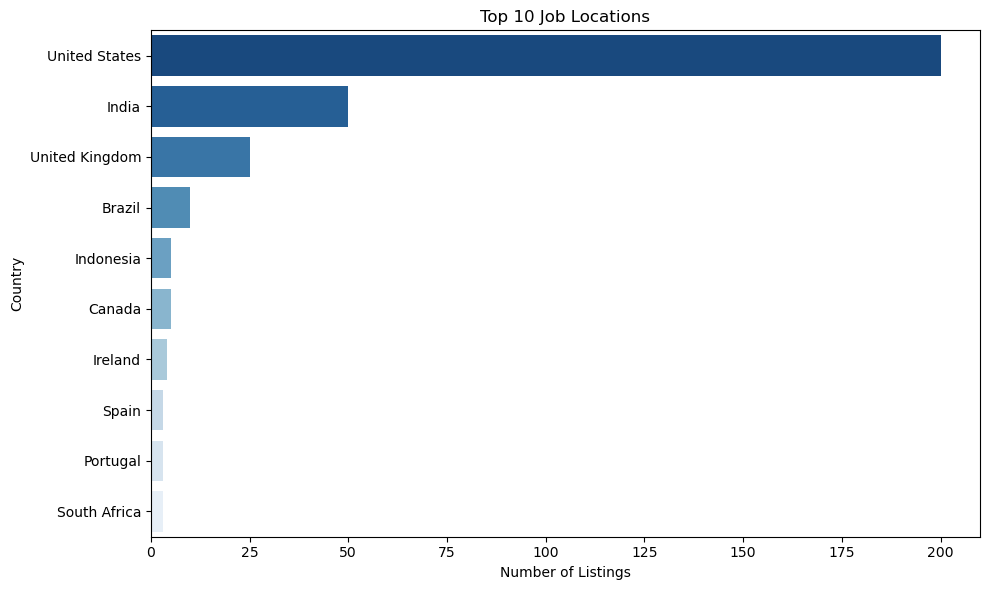

In [89]:
top_locations = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Blues_r')
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Listings')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('10 job locations.png', dpi=300, bbox_inches='tight')
plt.show()

This code snippet visualizes the **top 10 companies with the most job postings** using a horizontal bar chart.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15340\4067534750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='Blues_r')


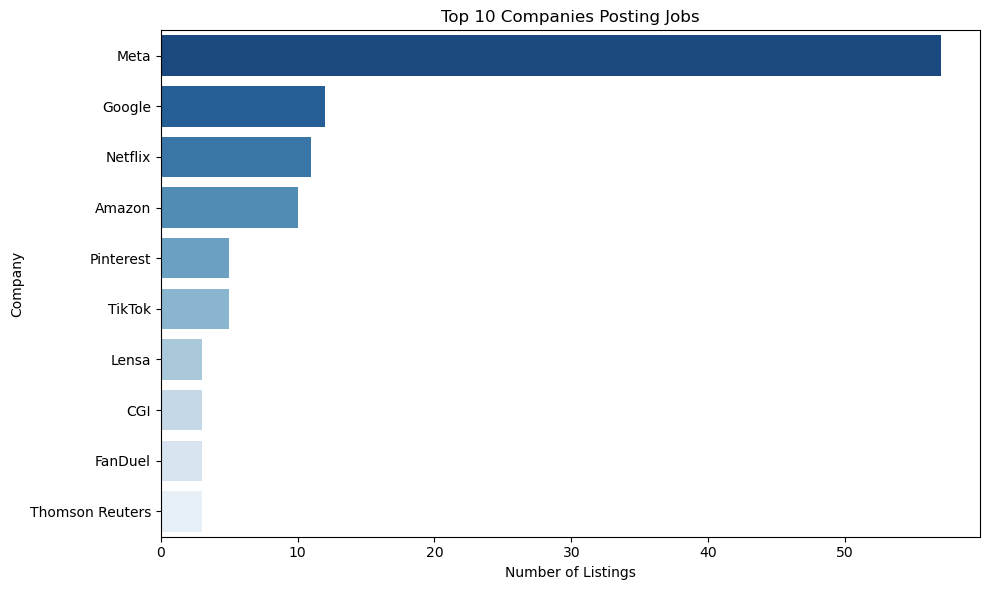

In [90]:
top_companies = df['company'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Blues_r')
plt.title('Top 10 Companies Posting Jobs')
plt.xlabel('Number of Listings')
plt.ylabel('Company')
plt.tight_layout()
plt.savefig('10 Companies.png', dpi=300, bbox_inches='tight')
plt.show()

This code block analyzes and visualizes **the number of job listings posted over time** using a line chart.

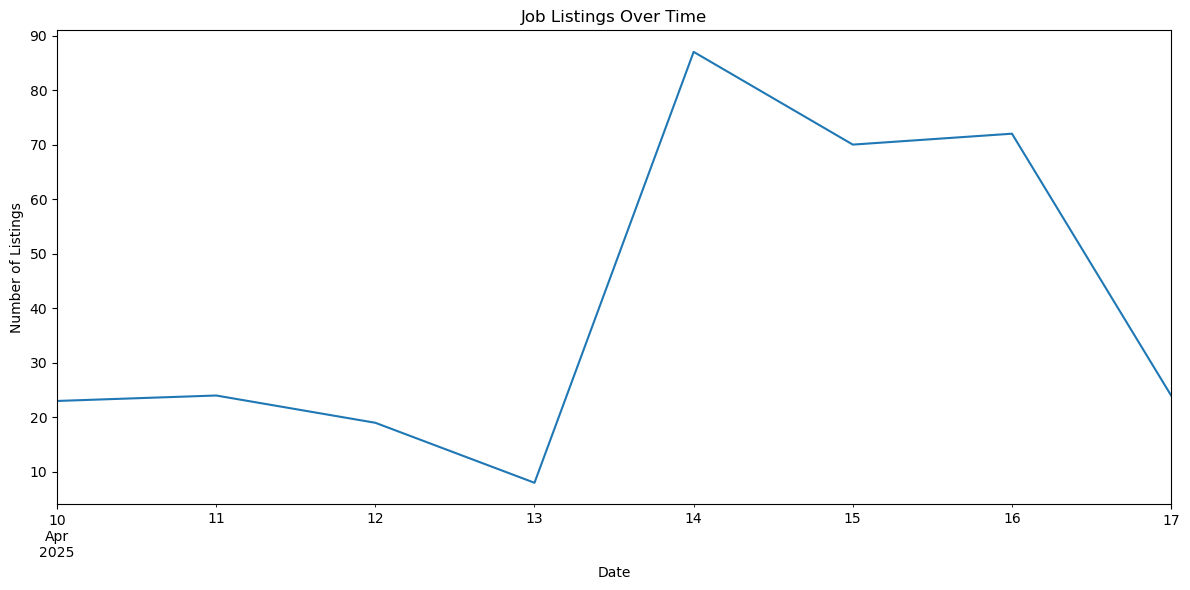

In [91]:
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')
jobs_by_date = df['date_posted'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
jobs_by_date.plot()
plt.title('Job Listings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.savefig('Job Listings Over Time.png', dpi=300, bbox_inches='tight')
plt.show()

This code generates and visualizes a **word cloud** from job descriptions in your dataset, highlighting the most frequently used words.

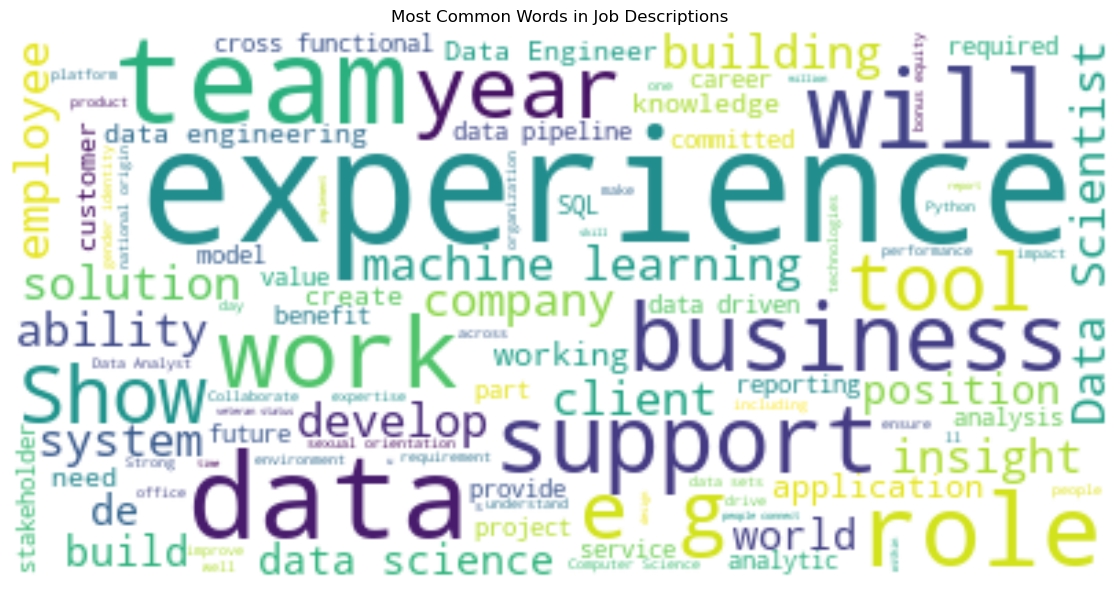

In [92]:
text = ' '.join(df['description'].dropna().tolist())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Job Descriptions')
plt.tight_layout()
plt.savefig('Most Common Words.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary:

Here’s the summary in bullet points:

- **Data Analyst** is the most common job title.

- **United States** has the highest number of job postings globally.

- **Meta** is the top company posting the most jobs.

- The most jobs were posted on **April 14th, 2025.**